In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station 

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
first_row = session.query(measure.date).order_by(measure.date.desc()).first()
first_row

('2017-08-23',)

Text(0, 0.5, 'Inches')

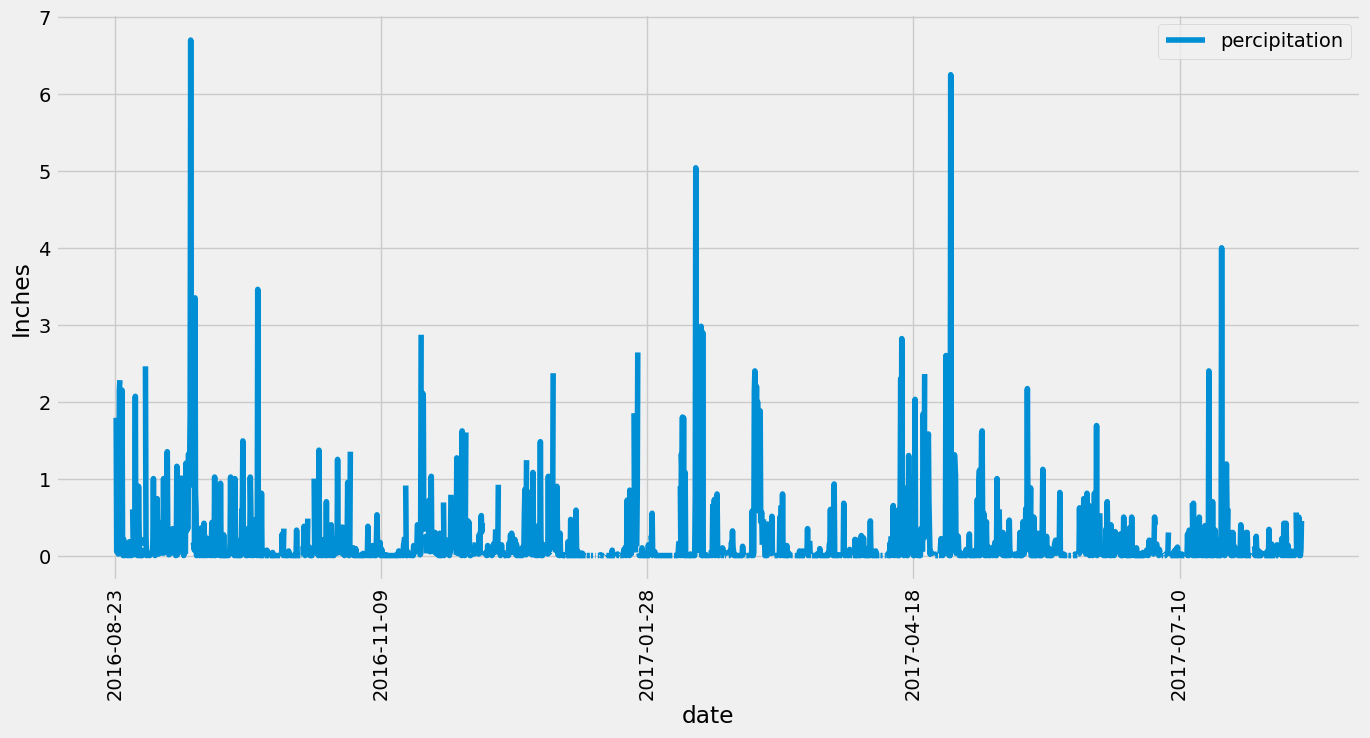

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = dt.date(2017,8,23)
start_date
year_ago = start_date - dt.timedelta(days = 365)
year_ago
# Perform a query to retrieve the data and precipitation scores
scores = session.query(measure.date, measure.prcp).filter(measure.date >= year_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
scores_df = pd.DataFrame(scores, columns = ['date', 'percipitation'])
scores_df.set_index('date', inplace= True)
# Sort the dataframe by date
scores_df.sort_index(inplace = True)
scores_df
# Use Pandas Plotting with Matplotlib to plot the data
scores_df.plot(kind = 'line', rot = 90, figsize = (15,7))
plt.ylabel('Inches')

In [12]:
scores_df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
scores_df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).distinct().count()

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sta_counts = session.query(measure.station.distinct(),
                            func.count(measure.station).label("total")).group_by(measure.station).order_by('total')

for row in sta_counts:
    print(row)

('USC00518838', 511)
('USC00517948', 1372)
('USC00511918', 1979)
('USC00514830', 2202)
('USC00516128', 2612)
('USC00519523', 2669)
('USC00513117', 2709)
('USC00519397', 2724)
('USC00519281', 2772)


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats = sta_counts[-1][0]
stats_filter = session.query(measure.station, measure.tobs).filter(measure.station == stats)
stats_df = pd.DataFrame(stats_filter, columns = ['station', 'tobs'])
stats_df['tobs'].describe()

count    2772.000000
mean       71.663781
std         4.357642
min        54.000000
25%        69.000000
50%        72.000000
75%        74.000000
max        85.000000
Name: tobs, dtype: float64

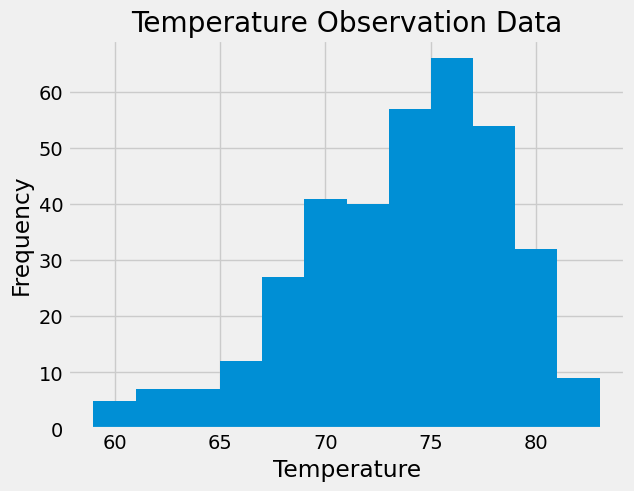

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
info = session.query(measure.tobs,measure.prcp).filter(measure.station == stats).filter(measure.date >= '2016-08-18').all()
temp = []
for row in info:
    temp.append(row.tobs)

plt.hist(temp, bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title('Temperature Observation Data')
plt.show()

In [18]:
stats

'USC00519281'

# Close Session

In [19]:
# Close Session
session.close()